# Data Mining and Machine Learning - Project

## Detecting Difficulty Level of French Texts

### Step by step guidelines

The following are a set of step by step guidelines to help you get started with your project for the Data Mining and Machine Learning class. 

#### 1. 📂 Create a public GitHub repository for your team using this naming convention `DMML2021_[your_team_name]` with the following structure:
- data (subfolder) 
- code (subfolder) 
- documentation (subfolder)
- a readme file (.md): *mention team name, participants, brief description of the project, approach and summary of results table.*

All team members should contribute to the GitHub repository.

#### 2. 🇰 Join the competititon on Kaggle using an invitation link like this one: https://www.kaggle.com/t/69884669004b482c96dd59e5d0c52044 

Under the Team tab, save your team name (`UNIL_your_team_name`) and make sure your team members join in as well. You can merge your user account with your teammates in order to create a team.

#### 3. 📓 Read the data into your colab notebook. There should be one code notebook per team, but all team members can participate and contribute code. 

You can use either direct the Kaggle API and your Kaggle credentials (as explained below and **entirely optional**), or dowload the data form Kaggle and upload it onto your team's GitHub repository under the data subfolder.

#### 4. 💎 Train your models and upload the code under your team's GitHub repo. Set the `random_state=0`.
- baseline
- logistic regression with TFidf vectoriser (simple, no data cleaning)
- KNN & hyperparameter optimisation (simple, no data cleaning)
- Decision Tree classifier & hyperparameter optimisation (simple, no data cleaning)
- Random Forests classifier (simple, no data cleaning)
- another technique or combination of techniques of your choice

#### 5. 🎥 Create a YouTube video (10-15 minutes) of your solution and embed it in your notebook. Explain the algorithms used and the evaluation of your solutions. All projects will also be presented live by the group during the last class.

DONE

### Submission details (one per team)
1. Add the link to your team's GitHub repository here: https://moodle.unil.ch/mod/url/view.php?id=841193

2. Download a ZIPped file of your team's repositiory and submit it in Moodle here: https://moodle.unil.ch/mod/assign/view.php?id=1194395

3. Post a link to your video in Slack under the project channel.

### Grading (one per team)
- 5 points presentation
- 5 points video 
- 10 points notebook quality 
- 10 points your solution

## Some further details for points 3 and 4 above.

### 3. Read data into your notebook with the Kaggle API (entirely optional). 

You can also download the data from Kaggle and put it in your team's repo the data folder.

In [1]:
import os
import sys
import get_dataset
import pandas as pd
import numpy as np
import numpy
import functs
from functs import evaluate
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import csv
import tensorflow as tf
from tensorflow import keras

import spacy as spacy
from spacy.attrs import LOWER, POS, ENT_TYPE, IS_ALPHA
from spacy.tokens import Doc
import numpy as np
from tqdm import tqdm
from gensim.models import word2vec
from keras_funct import *
import fr_core_news_md
np.random.seed = 0


In [2]:
# read in your training data


df = get_dataset.get_train_data()

In [3]:
df.head()

,sentence,difficulty
0,Les coûts kilométriques réels peuvent diverger...,C1
1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,Le test de niveau en français est sur le site ...,A1
3,Est-ce que ton mari est aussi de Boston?,A1
4,"Dans les écoles de commerce, dans les couloirs...",B1


Have a look at the data on which to make predictions.

In [4]:
df_pred = get_dataset.get_unlabelled_data()
df_pred.head()

,sentence
0,Nous dûmes nous excuser des propos que nous eû...
1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,"Et, paradoxalement, boire froid n'est pas la b..."
3,"Ce n'est pas étonnant, car c'est une saison my..."
4,"Le corps de Golo lui-même, d'une essence aussi..."


And this is the format for your submissions.

In [5]:
df_example_submission = get_dataset.get_sub_data()
df_example_submission.head()

,difficulty
0,A1
1,A1
2,A1
3,A1
4,A1


### 4. Train your models

Set your X and y variables. 
Set the `random_state=0`
Split the data into a train and test set using the following parameters `train_test_split(X, y, test_size=0.2, random_state=0)`.

#### 4.1.Baseline
What is the baseline for this classification problem? (you can use the highest label frequency from the entire training data, the df above)

In [6]:
pred = df.groupby('difficulty').count()
baseline_accuracy = pred['sentence'].max()/len(df)
print(f'The baseline accuracy is {round(baseline_accuracy*100,2)}%')

The baseline accuracy is 16.94%


#### 4.2. Logistic Regression (without data cleaning)

Train a simple logistic regression model using a Tfidf vectoriser.

In [7]:
corpus = df['sentence'].tolist()

X_train, X_test, y_train, y_test = train_test_split(corpus, df['difficulty'].tolist(),
                                                    test_size = 0.2,
                                                    random_state = 0)

In [8]:
pipe = Pipeline([('tfidf', TfidfVectorizer()), ('log_reg', LogisticRegression())])
pipe.fit(X_train, y_train)

pred = pipe.predict(X_test)

Calculate accuracy, precision, recall and F1 score on the test set.

AxesSubplot(0.125,0.125;0.62x0.755)
ACCURACY SCORE:
0.4667
CLASSIFICATION REPORT:
	Precision: 0.4645
	Recall: 0.4677
	F1_Score: 0.4640


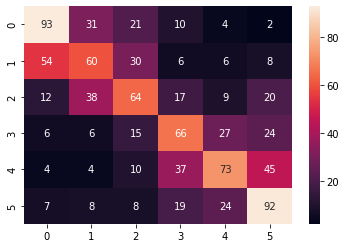

In [9]:
evaluate(y_test, pred)

Have a look at the confusion matrix and identify a few examples of sentences that are not well classified.

In [11]:
examples=pd.DataFrame(X_test, columns=["sentence"])
examples["true"]=y_test
examples["pred"]=pred
examples = examples[examples["true"] != examples["pred"]]

examples.head()


,sentence,true,pred
0,"C'est en décembre 1967, après bien des invecti...",C1,C2
1,Giscard va pourtant réussir à transformer ce r...,C1,B2
2,Un choix difficile mais important : le public ...,A2,B1
3,Le débat porte plutôt sur l'utilité d'une tell...,B1,C1
6,Il faut du temps et du courage pour soigner to...,A2,B1


In [13]:
log_reg = pd.DataFrame(pred, columns=['difficulty'])
log_reg.to_csv('log_reg_pred.csv')

Generate your first predictions on the `unlabelled_test_data.csv`. make sure your predictions match the format of the `unlabelled_test_data.csv`.

#### 4.3. KNN (without data cleaning)

Train a KNN classification model using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

AxesSubplot(0.125,0.125;0.62x0.755)
ACCURACY SCORE:
0.3187
CLASSIFICATION REPORT:
	Precision: 0.4007
	Recall: 0.3183
	F1_Score: 0.3022


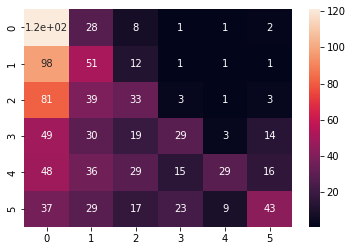

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
pipe = Pipeline([('tfidf', TfidfVectorizer()), ('KNN', KNN)])

pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
evaluate(y_test, pred)


Try to improve it by tuning the hyper parameters (`n_neighbors`,   `p`, `weights`).

Best hyperparameters: {'n_neighbors': 11, 'p': 2, 'weights': 'distance'}
AxesSubplot(0.125,0.125;0.62x0.755)
ACCURACY SCORE:
0.3542
CLASSIFICATION REPORT:
	Precision: 0.4197
	Recall: 0.3543
	F1_Score: 0.3450


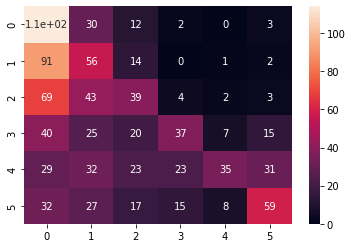

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_grid = {'n_neighbors' : np.arange(1,500,5),
            'p': np.arange(1,3),
            'weights' : ['uniform', 'distance']}

KNN = KNeighborsClassifier()
KNN_CV = GridSearchCV(KNN, knn_grid, cv = 5)
pipe = Pipeline([('tfidf', TfidfVectorizer()), ('KNN', KNN_CV)])

pipe.fit(X_train, y_train)
print('Best hyperparameters:', KNN_CV.best_params_)
pred = pipe.predict(X_test)


evaluate(y_test, pred)

#### 4.4. Decision Tree Classifier (without data cleaning)

Train a Decison Tree classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

AxesSubplot(0.125,0.125;0.62x0.755)
ACCURACY SCORE:
0.3104
CLASSIFICATION REPORT:
	Precision: 0.3106
	Recall: 0.3108
	F1_Score: 0.3083


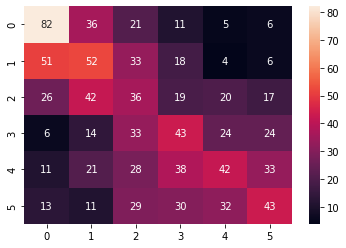

In [20]:
from sklearn.tree import DecisionTreeClassifier

pipe = Pipeline([('tfidf', TfidfVectorizer()), ('decision_tree', DecisionTreeClassifier())])
pipe.fit(X_train, y_train)

pred = pipe.predict(X_test)
evaluate(y_test, pred)

Try to improve it by tuning the hyper parameters (`max_depth`, the depth of the decision tree).

Hyperparameters: {'max_depth': 205}
AxesSubplot(0.125,0.125;0.62x0.755)
ACCURACY SCORE:
0.3031
CLASSIFICATION REPORT:
	Precision: 0.3048
	Recall: 0.3031
	F1_Score: 0.3005


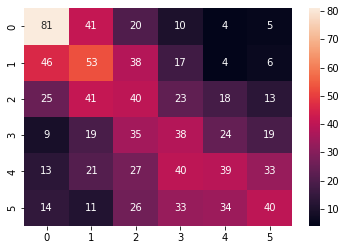

In [21]:
grid_tree = {'max_depth': np.arange(5,1000, 50)}

dec_tree = DecisionTreeClassifier()
dec_tree_CV = GridSearchCV(dec_tree, grid_tree, cv = 5)
pipe = Pipeline([('tfidf', TfidfVectorizer()), ('decision_tree_CV', dec_tree_CV)])

pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print("Hyperparameters:", dec_tree_CV.best_params_)
evaluate(y_test, pred)

#### 4.5. Random Forest Classifier (without data cleaning)

Try a Random Forest Classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

AxesSubplot(0.125,0.125;0.62x0.755)
ACCURACY SCORE:
0.4042
CLASSIFICATION REPORT:
	Precision: 0.4064
	Recall: 0.4062
	F1_Score: 0.3925


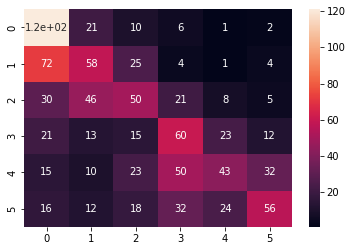

In [22]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier()
pipe = Pipeline([('tfidf', TfidfVectorizer()), ('random_forest_clf', random_forest_classifier)])
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
evaluate(y_test, pred)

#### 4.6. Any other technique, including data cleaning if necessary

Try to improve accuracy by training a better model using the techniques seen in class, or combinations of them.

As usual, show the accuracy, precision, recall and f1 score on the test set.

In [23]:
data = get_dataset.get_train_data()

In [3]:
feature1 = type_counter(data)
print("Feature 1 is done computing")
feature2 = vectorizer(data)
print("Feature 2 is done computing")
feature3 = word_len_counter(data)
print("Feature 3 is done computing")
feature4 = sk_vec(data)
print("Feature 4 is done computing")
feature = np.concatenate((feature1, feature2),axis = 1)
feature = np.concatenate((feature, feature3), axis = 1)
feature = np.concatenate((feature, feature4), axis = 1)

print("Features ready to be used")

1
2
3
4


In [4]:
y1, y2 = prepare_output(data)
print("Data ready to be used")

In [5]:
#X_train
feature_train = np.array(feature[:4000])
feature4_train = np.array(feature4[:4000])

#y_train
y2_train = np.asarray(y2[:4000])
y1_train = np.asarray(y1[:4000])

#X_test
feature_test = np.array(feature[4000:])
feature4_test = np.array(feature4[4000:])

#y_test
y2_test = np.asarray(y2[4000:])
y1_test = np.asarray(y1[4000:])

print("Data has been split")

In [6]:
model = keras.Sequential([
    keras.layers.Dense(input_shape = feature_train[0].shape, units=32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=6, activation='softmax')
    
    
])
print(model.summary())
model.compile(optimizer='adamax', 
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model.fit(np.asarray(feature_train), np.asarray(y2_train), epochs = 100, steps_per_epoch = 500, validation_split=0.01)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                2171264   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 198       
                                                                 
Total params: 2,171,462
Trainable params: 2,171,462
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
500/500 [==============================] - 5s 8ms/step - loss: 1.5755 - accuracy: 0.3212 - val_loss: 1.4074 - val_accuracy: 0.3750
Epoch 2/100
500/500 [==============================] - 4s 8ms/step - loss: 1.4399 - accuracy: 0.3765 - val_loss: 1.3522 - val_accuracy: 0.4000
Epoch 3/100
500/500

AxesSubplot(0.125,0.125;0.62x0.755)
ACCURACY SCORE:
0.5225
CLASSIFICATION REPORT:
	Precision: 0.5247
	Recall: 0.5267
	F1_Score: 0.5236


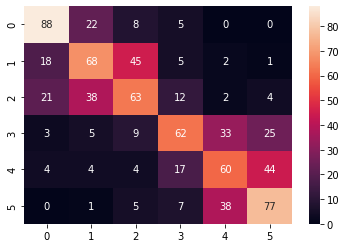

In [7]:
pred_train=model.predict(feature_test)
prediction_keras_train= []
for i in pred_train:
    prediction_keras_train.append(np.argmax(i))


reverse={0:"A1", 1:"A2", 2:"B1",3:"B2",4:"C1", 5:"C2"}

reversed_list_train=[reverse[k] for k in prediction_keras_train]

evaluate(y1_test, prediction_keras_train)

In [4]:
unlabelled = get_dataset.get_unlabelled_data()

unlabelled_feature1=type_counter_unlabelled(data, unlabelled)
print("Feature 1 is done computing")
unlabelled_feature2=vectorizer(unlabelled)
print("Feature 2 is done computing")
unlabelled_feature3=word_len_counter(unlabelled)
print("Feature 3 is done computing")
unlabelled_feature4=sk_vec_unlabelled(data,unlabelled)
print("Feature 3 is done computing")

unlabelled_feature = np.concatenate((unlabelled_feature1, unlabelled_feature2),axis = 1)
unlabelled_feature = np.concatenate((unlabelled_feature, unlabelled_feature3), axis = 1)
unlabelled_feature = np.concatenate((unlabelled_feature, unlabelled_feature4), axis = 1)
print("Features ready to be used")

In [8]:
model = keras.Sequential([
    keras.layers.Dense(input_shape = feature[0].shape, units=32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=6, activation='softmax'),
 
])
print(model.summary())
model.compile(optimizer='adamax', 
              loss=tf.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model.fit(np.asarray(feature), np.asarray(y2), epochs = 100, steps_per_epoch = 500, validation_split=0.01)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                2171264   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 198       
                                                                 
Total params: 2,171,462
Trainable params: 2,171,462
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
500/500 [==============================] - 4s 8ms/step - loss: 1.6102 - accuracy: 0.2841 - val_loss: 1.5323 - val_accuracy: 0.2708
Epoch 2/100
500/500 [==============================] - 4s 8ms/step - loss: 1.5006 - accuracy: 0.3435 - val_loss: 1.4330 - val_accuracy: 0.3125
Epoch 3/100
500/500

In [9]:

pred=model.predict(unlabelled_feature)
prediction_keras= []
for i in pred:
  prediction_keras.append(np.argmax(i))


reverse={0:"A1", 1:"A2", 2:"B1",3:"B2",4:"C1", 5:"C2"}

reversed_list=[reverse[k] for k in prediction_keras]
print(reversed_list)


['C2', 'B1', 'A1', 'A1', 'C2', 'C2', 'A2', 'A2', 'C2', 'A2', 'A1', 'A2', 'B2', 'C1', 'A1', 'A2', 'C2', 'A1', 'B1', 'A1', 'C2', 'A1', 'B2', 'C1', 'C1', 'C2', 'A1', 'A1', 'C2', 'B1', 'A2', 'A2', 'A2', 'A1', 'A2', 'B1', 'C1', 'B2', 'A1', 'A1', 'A2', 'B2', 'C2', 'C1', 'C1', 'C2', 'B2', 'C1', 'A1', 'A1', 'C1', 'A1', 'C1', 'A1', 'A1', 'C1', 'C1', 'B1', 'C1', 'B1', 'B2', 'A2', 'C2', 'C1', 'C2', 'B2', 'B1', 'A2', 'B1', 'C2', 'A1', 'C1', 'B2', 'B1', 'C1', 'A2', 'A1', 'C1', 'B1', 'B2', 'A2', 'A1', 'B1', 'B1', 'A1', 'C2', 'B1', 'B2', 'B2', 'B1', 'C2', 'A2', 'C1', 'C2', 'B1', 'A2', 'A1', 'A2', 'B1', 'C2', 'B1', 'B2', 'A1', 'A2', 'C2', 'C2', 'B2', 'A1', 'A2', 'C1', 'B2', 'A1', 'C1', 'C1', 'C2', 'B1', 'C1', 'B1', 'A2', 'B2', 'A1', 'B1', 'B1', 'C2', 'A2', 'C2', 'C1', 'C1', 'C1', 'C1', 'A1', 'A2', 'C1', 'C2', 'C2', 'C2', 'A2', 'C2', 'B1', 'B1', 'A1', 'C1', 'C2', 'C2', 'C1', 'C1', 'A1', 'C2', 'C2', 'C1', 'B2', 'B1', 'A1', 'A2', 'A2', 'C2', 'C1', 'A1', 'A1', 'A1', 'A2', 'A1', 'B2', 'B2', 'C2', 'C1', 'A1

In [17]:
keras_submission = pd.DataFrame()
keras_submission["difficulty"]=reversed_list

keras_submission.to_csv('keras_submission')


,difficulty
0,a
1,b
2,c


#### 4.7. Show a summary of your results